# Классификация - и снова в бой!

Сегодня мы поговорим о том, чему же мы научились за последние практики?

Мы освоили основным методы работы как с данными, на основе которых можно решить задачу классификации, так и с моделями, которые это делают! Щикарррно!

Сегодняшняя задачка как всегда несложная, но очень важная - нам предстоит предсказывать болезни сердца!

В вашем распоряжении датасет [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci). Ваша задача предсказать, есть ли у человека заболевание сердца или нет.

Как всегда, ждем от вас полноценного анализа исходных данных, подготовка необходимой предобработки, feature engineering и поиск лучшего варианта, которный даст наибольшую метрику!

* Задача под звездочкой. Попробуйте реализовать такую систему, которая реже пропускает больных пациентов - мы ведь не хотим больным людям говорить, что они здоровы, хотя это не так?

Мы желаем вам удачи - постарайтесь применить все накопленные знания и, может, чуть больше! Успехов!

In [1]:
# Настройки для визуализации
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['text.color'] = TEXT_COLOR
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.markersize'] = 15
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

sns.set_style('darkgrid')

# Зафиксируем состояние случайных чисел
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [2]:
df_src = pd.read_csv('heart.csv')
df_src.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#прверка на пустые значения
df_src.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#Проверка данных на сбалансированность
df_src['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
#стратификация при разделении данных stratify
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_src, test_size=0.3, stratify=df_src['target'],shuffle=True, random_state=RANDOM_SEED)

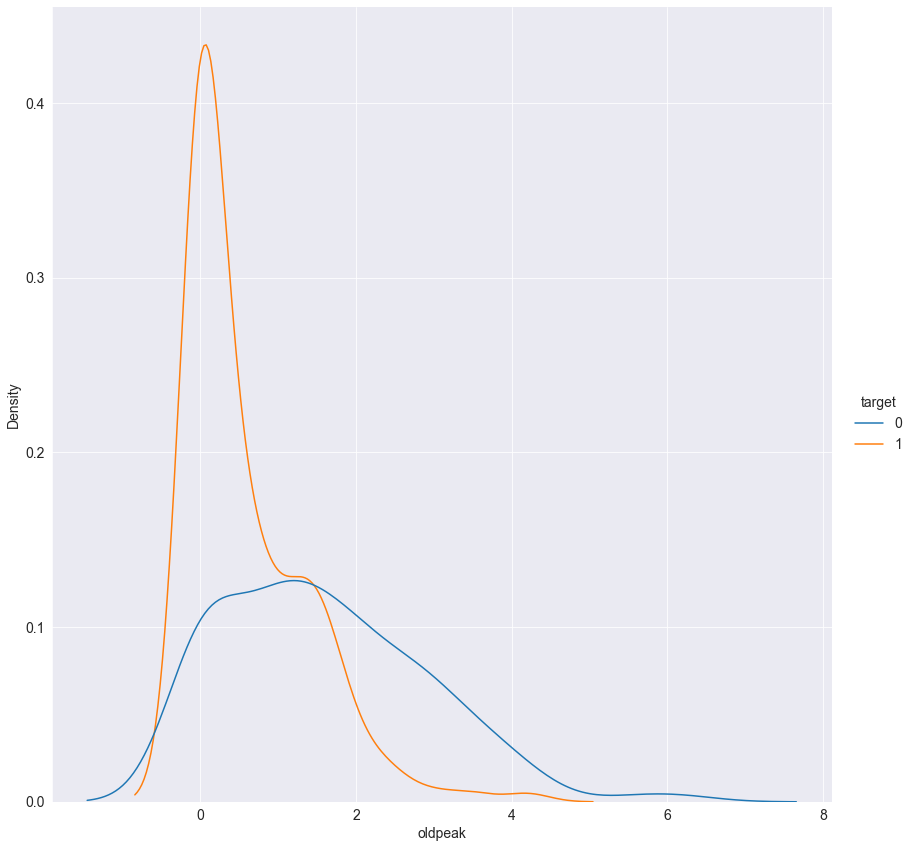

In [7]:
#распределение с меньшим пересечением
sns.displot(df_src, x='oldpeak', hue='target', kind='kde', height=12)

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

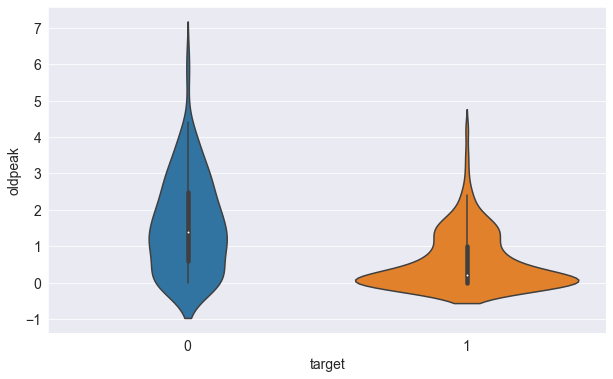

In [8]:
sns.violinplot(data=df_src, x='target', y='oldpeak')

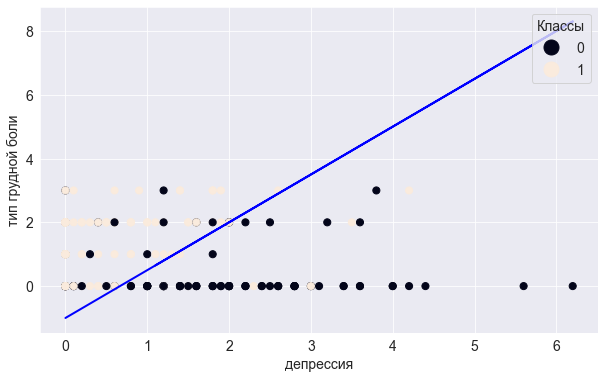

In [9]:
W1, W2, B = (-15, 10,10)

def plot_line(df, w1, w2, b):
    test_x1 = df['oldpeak']
    test_x2 = -(w1 * test_x1 + b) / w2

    plt.figure(figsize=[10, 6])
    plt.plot(test_x1, test_x2, linewidth=2, color='b')

    scatter = plt.scatter(train_df["oldpeak"],train_df["cp"], c=train_df["target"], marker='o', s=50)
    plt.legend(*scatter.legend_elements(), loc="upper right", title="Классы")
    plt.xlabel("депрессия")
    plt.ylabel("тип грудной боли")
    plt.grid(True)
    plt.show()

plot_line(train_df, W1, W2, B)

In [10]:
#создаем линейное предсказание с коэфф веса
def lin_reg_prediction(df, w1 ,w2, b):
    test_result = w1 * df["oldpeak"] + w2 * df["cp"] + b
    return test_result

In [11]:
lin_reg_pred = lin_reg_prediction(train_df, W1, W2, B)
_sample_df = pd.DataFrame({'ligreg': lin_reg_pred, 'target': train_df['target']})

In [12]:
_sample_df.head()

,ligreg,target
144,13.5,1
215,-35.0,0
230,30.0,0
66,12.0,1
288,-35.0,0


In [13]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_linreg_prediction(df, w1, w2, b):
    z = lin_reg_prediction(df, w1, w2, b)
    y = sigmoid(z) > 0.5
    return y.astype(int)

sigmoid_pred = sigmoid_linreg_prediction(train_df, W1, W2, B)
_sample_df['sigmoid'] = np.round(sigmoid_pred, 3)

In [14]:
y_pred = sigmoid_linreg_prediction(test_df, W1, W2, B)

In [15]:
def compute_accuracy(y_true,y_pred):
    boolarr=[y_true==y_pred]
    acc=np.sum(boolarr)/len(y_pred)
    return acc
    
accuracy = compute_accuracy(test_df['target'], y_pred)
accuracy

0.7032967032967034

In [16]:
from sklearn.linear_model import LogisticRegression

# создаём объект модели
model = LogisticRegression(random_state=RANDOM_SEED)
y_train = train_df.pop('target')

# обучаем модель на обучающей выборке 
model.fit(train_df, y_train)
y_test = test_df.pop('target')

# получаем предсказания на тестовой выборке 
y_pred1 = model.predict(test_df)

C:\Users\vlaik\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
def CM(y_test, y_pred1):
    rec = recall_score(y_test, y_pred1,average='binary',pos_label=1)
    prec = precision_score(y_test, y_pred1)
    f1 = f1_score(y_test, y_pred1,)
    var_dict = {
        'recall' : rec,
        'precision' : prec,
        'f1' : f1
    }
    return var_dict

In [18]:
#метрики для "самодельной" модели 
test_metrics = CM(y_test, y_pred)
test_metrics

{'recall': 0.82, 'precision': 0.6949152542372882, 'f1': 0.7522935779816514}

In [19]:
#метрики для встроенной модели 
test_metrics = CM(y_test, y_pred1)
test_metrics

{'recall': 0.8, 'precision': 0.7547169811320755, 'f1': 0.7766990291262137}

In [20]:
#т.к пропустить больного страшнее, чем назвать здорового больным.
#Меняем порог, оптимальный порог выбираем по графику 
def predict_threshold(y_probs, threshold):
    result=[]
    for i in y_probs[:,1]:
        if i>=threshold:
            result.append(1)
        else:
            result.append(0)
    return result

In [21]:
y_probs = model.predict_proba(test_df)
y_pred_02 = predict_threshold(y_probs, 0.2)
test_metrics = CM(y_test, y_pred_02)
test_metrics
#Получили больший recall 0,94 

{'recall': 0.94, 'precision': 0.7704918032786885, 'f1': 0.8468468468468469}

In [23]:
accuracy = compute_accuracy(y_test, y_pred_02)
print(f'acc= {accuracy}')

acc= 0.8131868131868132


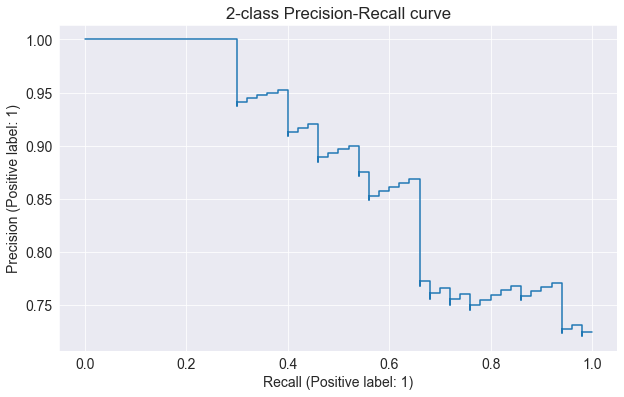

In [24]:
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(model,test_df, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')
disp.ax_.get_legend().remove()

In [25]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

def pr_auc(y_true, y_probs):
    global  precision, recall, thresholds 
    precision, recall, thresholds = precision_recall_curve(y_true, y_probs[:,1])
    AUC=metrics.auc(recall,precision)
    return AUC

In [26]:
pr_auc(y_test,y_probs)

0.8804744890716996

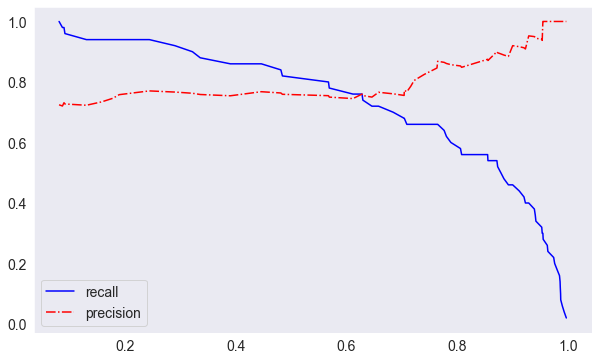

In [27]:
from matplotlib import pyplot as plt
plt.plot(thresholds, recall[0:-1],'b-',label='recall')
plt.plot(thresholds,precision[0:-1],'r-.',label='precision')
plt.grid()
plt.legend()
plt.show()

In [28]:
def roc_auc(y_true,y_probs):
    from sklearn.metrics import roc_curve
    from sklearn import metrics
    
    y_probs = y_probs[:,1]
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_true, y_probs)
    auc = metrics.auc(fpr_rf, tpr_rf)
    return auc

In [29]:
roc_auc(y_test,y_probs)

0.8614634146341464

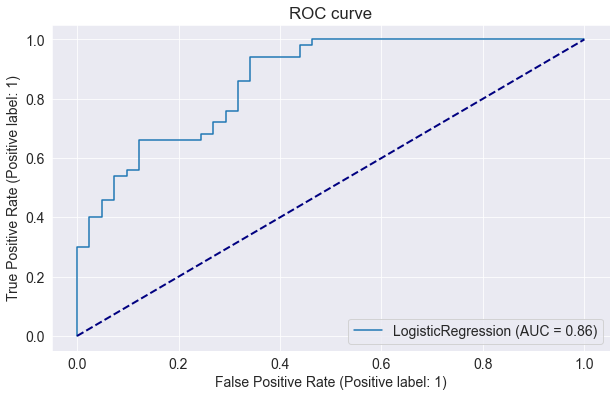

In [30]:
#Receiver operating characteristic
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(model,test_df, y_test, )
disp.ax_.set_title('ROC curve')
disp.ax_.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#не нужно переворачивать классы, тк диагональная линия лежит под кривой